# Visualização de Dados Financeiros 📊

## 1.1 Bases de Dados com 1 ação

In [1]:
# Importação das bibliotecas 
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

from pandas_datareader import data

In [2]:
# Bases de dados com uma ação
gol_df = data.DataReader(name = 'GOLL4.SA', 
                         data_source = 'yahoo', 
                         start = '2015-01-01')

# Adj Close - Valor Real com dividendos

gol_df.tail()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2021-01-15  24.139999  23.240000  23.750000  23.520000  5942700.0  23.520000
2021-01-18  24.940001  23.580000  24.010000  23.790001  8911200.0  23.790001
2021-01-19  24.280001  23.030001  24.090000  23.240000  6863200.0  23.240000
2021-01-20  23.700001  22.530001  23.459999  22.850000  5024300.0  22.850000
2021-01-21  23.250000  22.620001  23.129999  22.639999  2222000.0  22.639999

In [4]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1502 entries, 2015-01-02 to 2021-01-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1502 non-null   float64
 1   Low        1502 non-null   float64
 2   Open       1502 non-null   float64
 3   Close      1502 non-null   float64
 4   Volume     1502 non-null   float64
 5   Adj Close  1502 non-null   float64
dtypes: float64(6)
memory usage: 82.1 KB


In [3]:
gol_df.describe()

High          Low         Open        Close        Volume  \
count  1502.000000  1502.000000  1502.000000  1502.000000  1.502000e+03   
mean     15.304601    14.537577    14.930979    14.895493  4.725880e+06   
std      10.399112    10.005012    10.203988    10.199648  4.912964e+06   
min       1.180000     1.130000     1.160000     1.160000  0.000000e+00   
25%       7.105000     6.660000     6.892500     6.907500  1.813725e+06   
50%      12.805000    12.000000    12.445000    12.365000  3.034150e+06   
75%      21.704999    20.492500    21.062500    20.987500  5.796700e+06   
max      44.619999    41.310001    43.669998    43.790001  4.368050e+07   

         Adj Close  
count  1502.000000  
mean     14.895493  
std      10.199648  
min       1.160000  
25%       6.907500  
50%      12.365000  
75%      20.987500  
max      43.790001

In [5]:
gol_df[gol_df.Close >= 43.79]

High    Low   Open      Close     Volume  Adj Close
Date                                                                
2019-08-01  44.619999  41.25  41.25  43.790001  6664200.0  43.790001

In [11]:
gol_df[(gol_df.Close >= 1.15) & (gol_df.Close <= 1.16)]

High   Low  Open  Close     Volume  Adj Close
Date                                                     
2016-01-22  1.26  1.14   1.2   1.16  3830600.0       1.16

In [13]:
gol_df.to_csv('gol.csv')

In [17]:
gol_df2 = pd.read_csv('gol.csv')

gol_df2.head()

Date   High    Low   Open  Close     Volume  Adj Close
0  2015-01-02  15.20  14.61  14.97  14.99   901900.0      14.99
1  2015-01-05  15.01  14.41  14.90  14.85  1272500.0      14.85
2  2015-01-06  15.21  14.65  14.75  15.21  2183500.0      15.21
3  2015-01-07  15.33  14.55  15.15  14.55  1846900.0      14.55
4  2015-01-08  14.65  14.20  14.41  14.27  1569500.0      14.27

## 1.2 Bases de Dados com mais ações

In [8]:
# PS: SA é para bolsa de SP
# BOVA11: Indice BOVESPA

acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA' ]

acoes_df = pd.DataFrame()

for acao in acoes:
    acoes_df[acao] = data.DataReader(acao, 
                                     data_source= 'yahoo', 
                                     start = '2015-01-01')['Close']#aqui pega só a close

In [9]:
acoes_df.head()

GOLL4.SA  CVCB3.SA   WEGE3.SA  MGLU3.SA   TOTS3.SA  BOVA11.SA
Date                                                                     
2015-01-02     14.99     15.20  11.846153  0.232812  11.910702  47.259998
2015-01-05     14.85     15.00  11.926923  0.237187  11.544731  46.320000
2015-01-06     15.21     14.80  11.750000  0.234062  10.822770  46.580002
2015-01-07     14.55     14.67  11.615384  0.241875  10.746248  48.150002
2015-01-08     14.27     14.15  11.811538  0.240000  10.995774  48.509998

In [10]:
acoes_df = acoes_df.rename(columns = {'GOLL4.SA': 'GOL',
                                       'CVCB3.SA': 'CVC',
                                       'WEGE3.SA': 'WEGE',
                                       'MGLU3.SA': 'MAGALU',
                                       'TOTS3.SA': 'TOTS',
                                       'BOVA11.SA': 'BOVA'})
acoes_df.head()

GOL    CVC       WEGE    MAGALU       TOTS       BOVA
Date                                                               
2015-01-02  14.99  15.20  11.846153  0.232812  11.910702  47.259998
2015-01-05  14.85  15.00  11.926923  0.237187  11.544731  46.320000
2015-01-06  15.21  14.80  11.750000  0.234062  10.822770  46.580002
2015-01-07  14.55  14.67  11.615384  0.241875  10.746248  48.150002
2015-01-08  14.27  14.15  11.811538  0.240000  10.995774  48.509998

In [11]:
# Checando se há dados faltantes

acoes_df.isnull().sum()

GOL       0
CVC       0
WEGE      0
MAGALU    0
TOTS      0
BOVA      4
dtype: int64

In [12]:
acoes_df.shape

(1502, 6)

In [30]:
acoes_df.dropna(inplace = True)

acoes_df.shape

(1496, 6)

In [13]:
acoes_df.to_csv('acoes.csv')

In [14]:
acoes_df = pd.read_csv('acoes.csv')

acoes_df.head()

Date    GOL    CVC       WEGE    MAGALU       TOTS       BOVA
0  2015-01-02  14.99  15.20  11.846153  0.232812  11.910702  47.259998
1  2015-01-05  14.85  15.00  11.926923  0.237187  11.544731  46.320000
2  2015-01-06  15.21  14.80  11.750000  0.234062  10.822770  46.580002
3  2015-01-07  14.55  14.67  11.615384  0.241875  10.746248  48.150002
4  2015-01-08  14.27  14.15  11.811538  0.240000  10.995774  48.509998

In [15]:
acoes_df.describe()

GOL          CVC         WEGE       MAGALU         TOTS  \
count  1502.000000  1502.000000  1502.000000  1502.000000  1502.000000   
mean     14.895486    32.327086    23.028168     5.361700    13.580716   
std      10.199643    16.053134    17.620213     6.978801     5.920666   
min       1.160000     6.490000     9.884615     0.030585     7.156402   
25%       6.907500    18.100000    12.707692     0.212500     9.836311   
50%      12.365000    27.825000    17.115383     2.462968    10.737931   
75%      20.987500    47.190001    22.400000     7.308594    15.290000   
max      43.790001    64.800003    92.209999    27.450001    31.070000   

              BOVA  
count  1498.000000  
mean     73.072628  
std      20.775966  
min      36.450001  
25%      54.985000  
50%      72.000000  
75%      91.965000  
max     120.400002

## 2. Visualização

### 2.1 Histograma

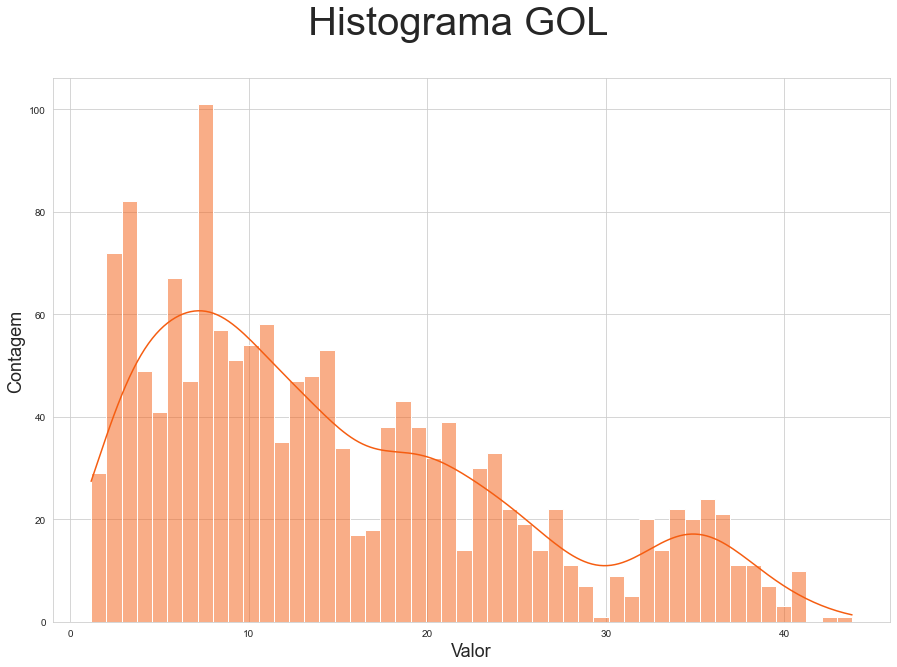

In [16]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize = (15,10))

ax = sns.histplot(acoes_df.GOL, 
                 color = '#f55d11',
                 bins  = 50,
                 kde = True)

plt.suptitle('Histograma GOL', 
            size = 40)

plt.xlabel('Valor')
plt.ylabel('Contagem')

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

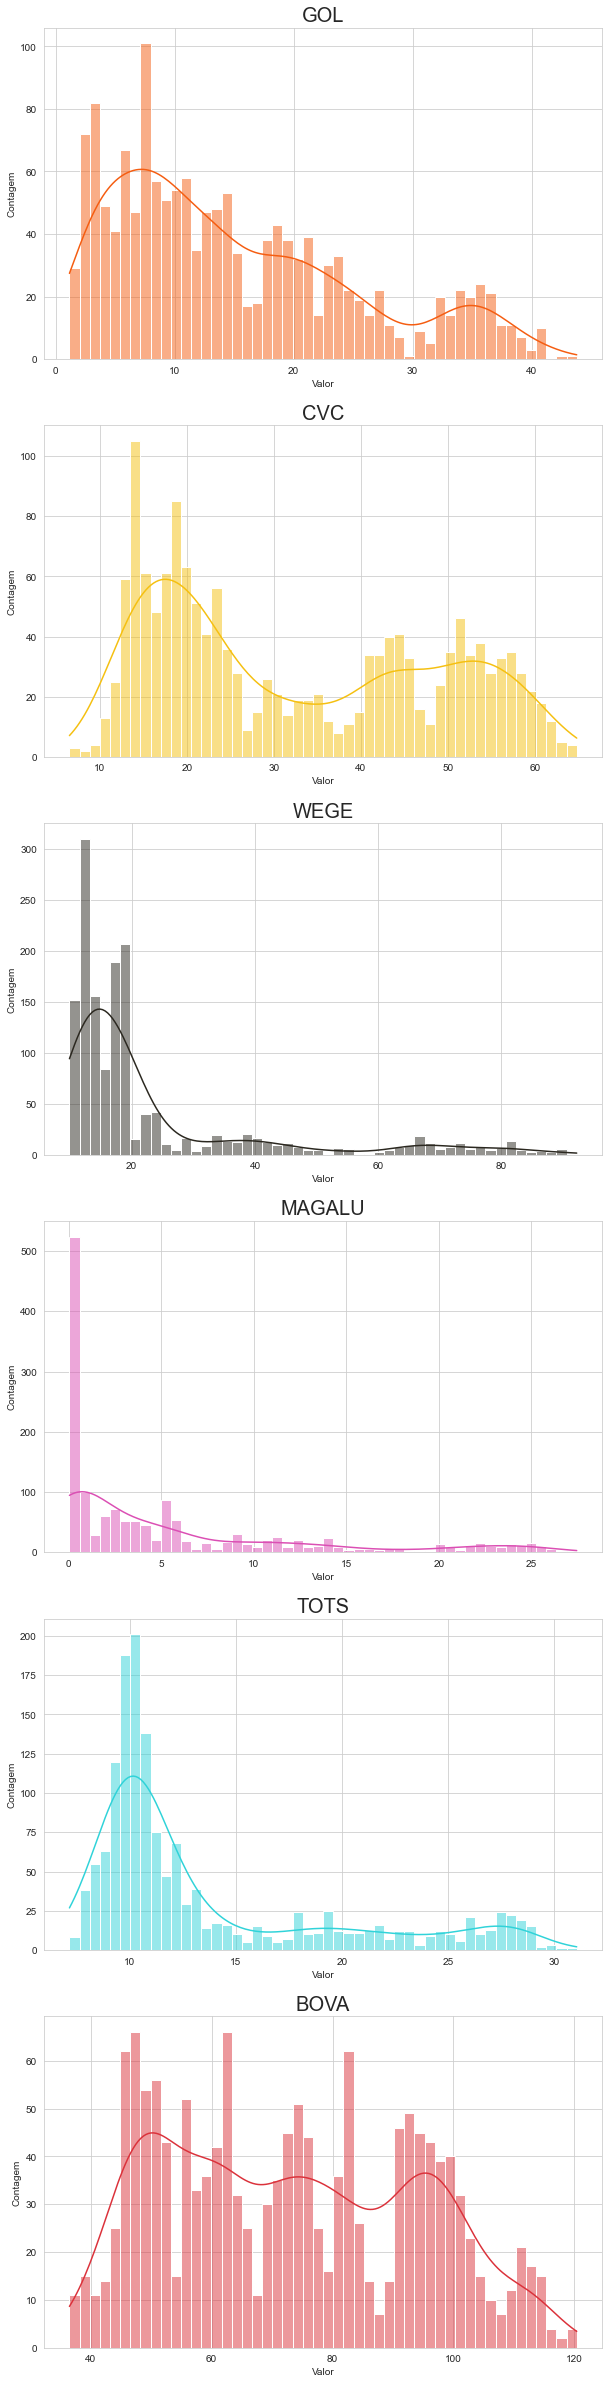

In [17]:
sns.set_style('whitegrid')

plt.figure(figsize = (10,50))

cor = ['#f55d11', '#f5c011', '#2b2820', '#db4fb4', '#30d3d9', '#db323b' ]

i = 1
for i in np.arange(1, len(acoes_df.columns)):
    
    plt.subplot(7,1, i + 1)
    
    sns.histplot(acoes_df[acoes_df.columns[i]],
                 color = cor[i - 1],
                 bins = 50, 
                 kde = True)
    
    plt.title(acoes_df.columns[i],
             size = 20)
    
    plt.xlabel('Valor')
    plt.ylabel('Contagem')

### 2.2 Box Plot

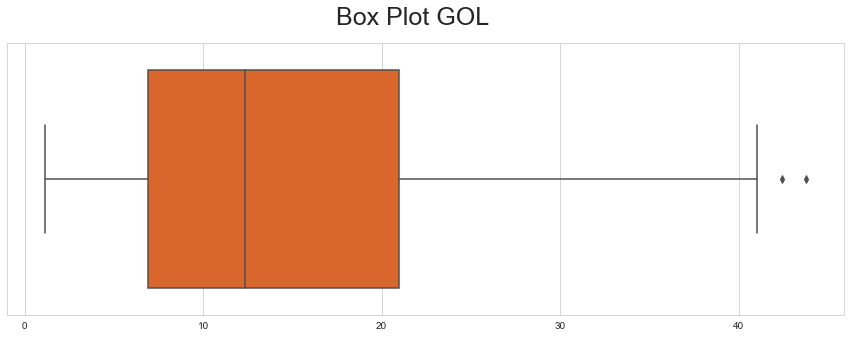

In [31]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize = (15,5))

ax = sns.boxplot(x = acoes_df.GOL, 
                 color = '#f55d11')

plt.suptitle('Box Plot GOL', 
             size = 25)

plt.xlabel('');

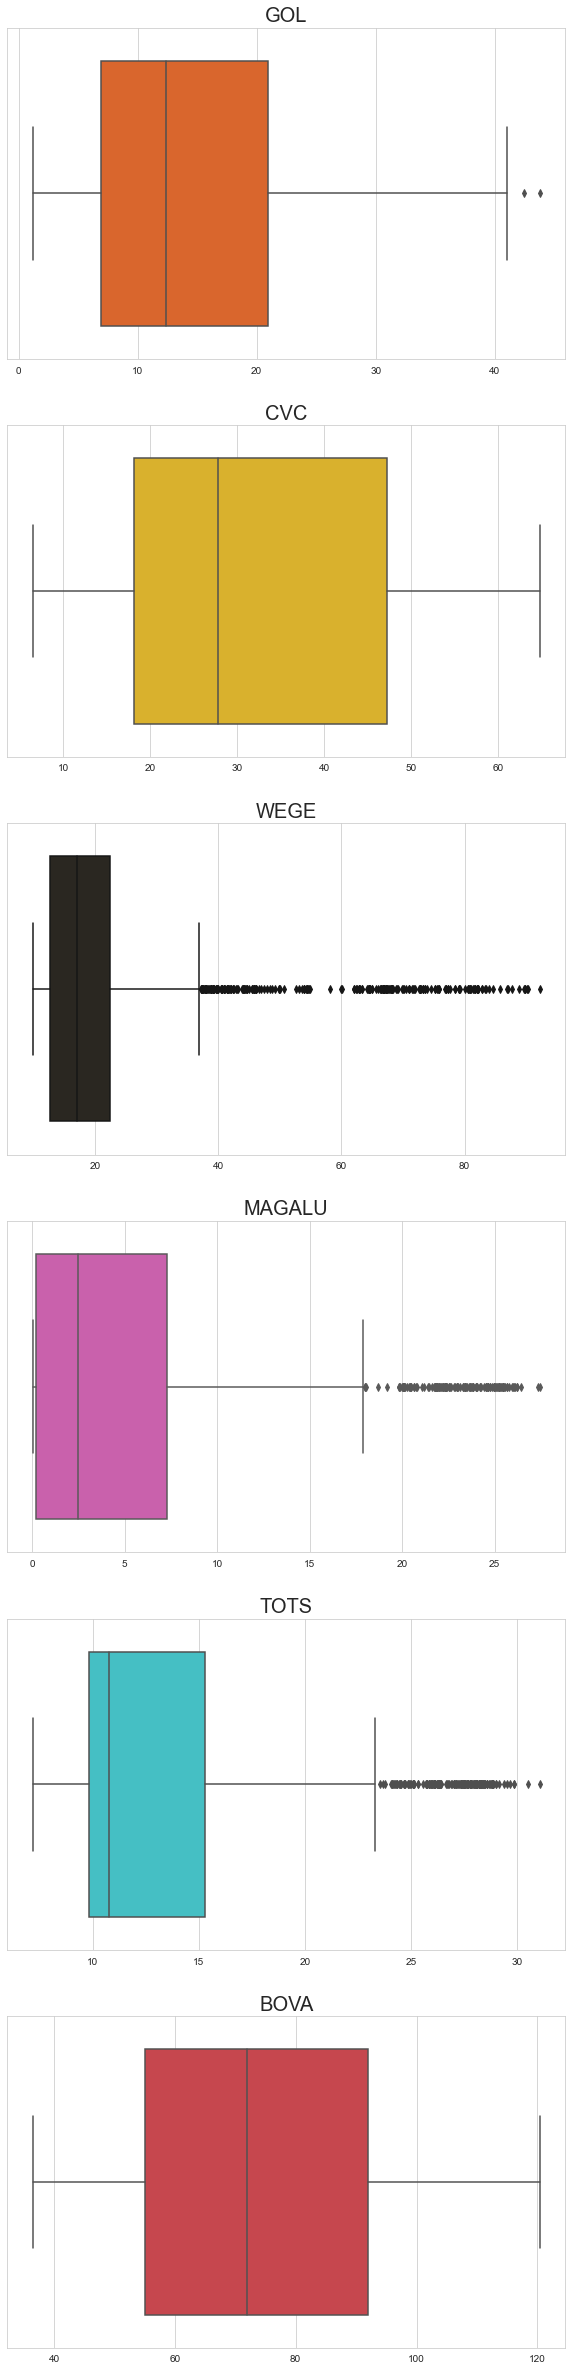

In [32]:
sns.set_style('whitegrid')

plt.figure(figsize = (10,50))

cor = ['#f55d11', '#f5c011', '#2b2820', '#db4fb4', '#30d3d9', '#db323b' ]

i = 1
for i in np.arange(1, len(acoes_df.columns)):
    
    plt.subplot(7,1, i + 1)
    
    sns.boxplot(x = acoes_df[acoes_df.columns[i]],
                 color = cor[i - 1])
    
    plt.title(acoes_df.columns[i],
             size = 20)
    
    plt.xlabel('')

### 2.3 Linhas

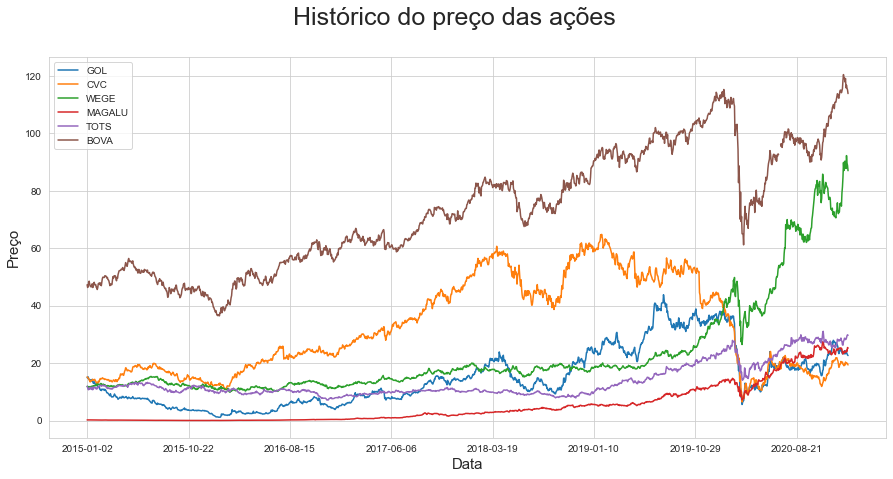

In [44]:
ax = acoes_df.plot(x = 'Date', figsize = (15,7))

plt.suptitle('Histórico do preço das ações', 
             size = 25)

plt.xlabel('Data')
plt.ylabel('Preço')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15);

### 2.4 Normalização de Dados

In [45]:
acoes_df_normalizado = acoes_df.copy()

for i in acoes_df_normalizado.columns[1:]:
    acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
    
acoes_df_normalizado.head()

Date       GOL       CVC      WEGE    MAGALU      TOTS      BOVA
0  2015-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2015-01-05  0.990660  0.986842  1.006818  1.018792  0.969274  0.980110
2  2015-01-06  1.014676  0.973684  0.991883  1.005369  0.908659  0.985612
3  2015-01-07  0.970647  0.965132  0.980519  1.038928  0.902235  1.018832
4  2015-01-08  0.951968  0.930921  0.997078  1.030875  0.923184  1.026449

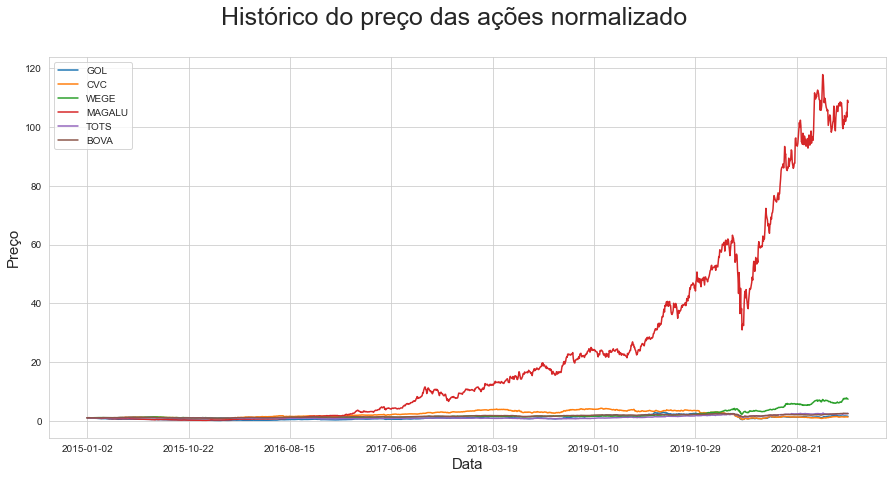

In [47]:
ax = acoes_df_normalizado.plot(x = 'Date', figsize = (15,7))

plt.suptitle('Histórico do preço das ações normalizado', 
             size = 25)

plt.xlabel('Data')
plt.ylabel('Preço')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15);

In [48]:
acoes_df_normalizado.tail()

Date       GOL       CVC      WEGE      MAGALU      TOTS      BOVA
1497  2021-01-15  1.569046  1.301316  7.404936  102.486128  2.376854  2.449852
1498  2021-01-18  1.587058  1.326316  7.783961  105.020362  2.417993  2.469043
1499  2021-01-19  1.550367  1.307237  7.563637  103.431093  2.478443  2.446678
1500  2021-01-20  1.524350  1.303947  7.496105  109.186811  2.506989  2.434829
1501  2021-01-21  1.509673  1.273684  7.340780  108.413654  2.491877  2.407956

### 2.5 Plot Dinâmico

In [ ]:
figura = px.line()

for i in acoes_df.columns[1:]:
    figura.add_scatter(x = acoes_df.Date, y = acoes_df[i], name = i)
    
figura.update_layout(title = 'Histórico do preço das ações', title_x=0.5)

In [60]:
figura = px.line()

for i in acoes_df_normalizado.columns[1:]:
    figura.add_scatter(x = acoes_df_normalizado.Date, y = acoes_df_normalizado[i], name = i)
    
figura.update_layout(title = 'Histórico do preço das ações normalizado', title_x=0.5)